In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
 num_words=10000)


2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
 [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
 [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [ ]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels, dimension=46):
 results = np.zeros((len(labels), dimension))
 for i, label in enumerate(labels):
  results[i, label] = 1.
 return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
from tensorflow.keras.utils import to_categorical #Built in method
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
 layers.Dense(64, activation="relu"),
 layers.Dense(64, activation="relu"),
 layers.Dense(46, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [ ]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 4s 149ms/step - loss: 2.7128 - accuracy: 0.5202 - val_loss: 1.8548 - val_accuracy: 0.6170
Epoch 2/20
16/16 [==============================] - 1s 73ms/step - loss: 1.5521 - accuracy: 0.6783 - val_loss: 1.3782 - val_accuracy: 0.6990
Epoch 3/20
16/16 [==============================] - 1s 73ms/step - loss: 1.1828 - accuracy: 0.7374 - val_loss: 1.1798 - val_accuracy: 0.7400
Epoch 4/20
16/16 [==============================] - 1s 66ms/step - loss: 0.9671 - accuracy: 0.7913 - val_loss: 1.0901 - val_accuracy: 0.7570
Epoch 5/20
16/16 [==============================] - 1s 62ms/step - loss: 0.8031 - accuracy: 0.8260 - val_loss: 1.0045 - val_accuracy: 0.7830
Epoch 6/20
16/16 [==============================] - 1s 62ms/step - loss: 0.6677 - accuracy: 0.8572 - val_loss: 0.9474 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 1s 62ms/step - loss: 0.5571 - accuracy: 0.8850 - val_loss: 0.9183 - val_accuracy: 0.8130
Epoch 8/20
1

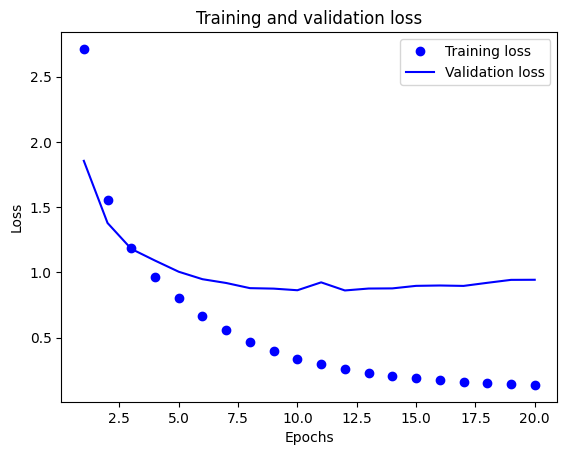

In [ ]:
import matplotlib.pyplot as plt



loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

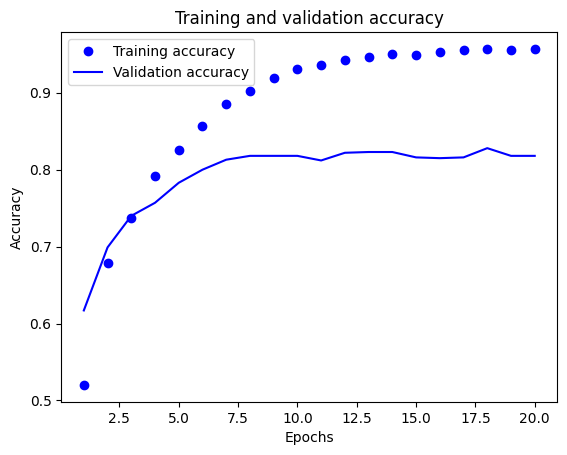

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(x_test, y_test)
print(results)

71/71 [==============================] - 0s 6ms/step - loss: 1.0439 - accuracy: 0.8014
[1.0438916683197021, 0.8014247417449951]


In [ ]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 5ms/step


In [ ]:
predictions

array([[2.3834913e-07, 3.1797359e-07, 7.2902445e-10, ..., 5.1196443e-09,
        1.0672860e-08, 8.2863522e-10],
       [2.0148907e-02, 9.7654032e-04, 1.0305909e-02, ..., 2.8066377e-06,
        1.6488102e-05, 1.5081440e-03],
       [1.1537938e-03, 8.4419316e-01, 5.3605396e-05, ..., 1.9188099e-06,
        2.3921084e-05, 2.8013042e-04],
       ...,
       [5.2418654e-06, 2.4280176e-05, 2.2079487e-06, ..., 1.3002850e-05,
        1.1777776e-05, 1.6173075e-06],
       [1.9239312e-02, 5.7771310e-02, 4.0507871e-03, ..., 1.7372477e-03,
        8.8000775e-04, 2.2392212e-03],
       [1.7170637e-03, 3.6968771e-01, 2.3154225e-03, ..., 1.4280522e-05,
        3.5704488e-05, 2.5146379e-04]], dtype=float32)

In [ ]:
 np.argmax(predictions[0])

3